# XGBoost Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading and reading the dataset

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


### Splitting datasets into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

### Finding the optimal trees with XGBoost

[15:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<function matplotlib.pyplot.legend(*args, **kwargs)>

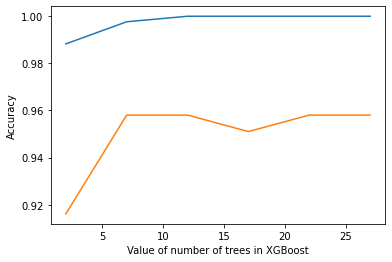

In [5]:
tree_range = range(2,30,5)
score_1 = []
score_2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train, y_train)
    score_1.append(xgb.score(X_train, y_train))
    score_2.append(xgb.score(X_test, y_test))
%matplotlib inline
plt.plot(tree_range, score_1, label="Accuracy on Train Set")
plt.plot(tree_range, score_2, label="Accuracy on Test Set")
plt.xlabel("Value of number of trees in XGBoost")
plt.ylabel("Accuracy")
plt.legend


### Accuracy of training and test set at tree = 7

In [6]:
xgb = XGBClassifier(n_estimators=25)
xgb.fit(X_train, y_train)
print("Accuracy of tree = 25 on the training set is: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy of tree = 25 on the testing set is: {:.3f}".format(xgb.score(X_test, y_test)))

[15:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of tree = 25 on the training set is: 1.000
Accuracy of tree = 25 on the testing set is: 0.958
